# DIVVY DATA

In [2]:
myDir <- "C:/Users/Mostafa/Google Drive/Data Incubator/Project/Inputs"
setwd(myDir)
# read files
station_df <- read.csv("Divvy_Stations_2016_Q4.csv")
station_name <- c("Benson Ave & Church St", "Chicago Ave & Washington St", "Elmwood Ave & Austin St", 
                  "Valli Produce - Evanston Plaza", "Dodge Ave & Church St", "Central St Metra",
                  "Central St & Girard Ave", "Chicago Ave & Sheridan Rd", "Sheridan Rd & Noyes St (NU)",
                  "University Library (NU)")
Evanston_stations_df <- station_df[station_df$name %in% station_name,]

# Trip Data
myFiles <- dir(myDir, pattern = "Trips", full.names = TRUE)

trips_df <- data.frame()
for (file in myFiles){
  trips_df <- rbind(trips_df, read.csv(file, stringsAsFactors = FALSE)) 
}

colnames(trips_df)[2:3] <-c("starttime_str", "stoptime_str")

## Date and Time

In [3]:
#install.packages("lubridate")
library(lubridate)

my_tz <- Sys.timezone()

myFormat <- c("%m/%d/%Y %H:%M:%S", "%m/%d/%Y %H:%M")
trips_df$StartTime <- parse_date_time(trips_df$starttime_str, myFormat, tz = my_tz)
trips_df$StopTime <- parse_date_time(trips_df$stoptime_str, myFormat, tz = my_tz)

trips_df$StartDate <- as.Date(trips_df$StartTime, tz = my_tz)
trips_df$StopDate <- as.Date(trips_df$StopTime, tz = my_tz)


# order the data based on starttime
trips_df <- trips_df[order(trips_df$StartTime),]

# Day
trips_df$StartTime_Day <- month(trips_df$StartTime)
trips_df$StopTime_Day <- month(trips_df$StopTime)

# Month
trips_df$StartTime_Month <- month(trips_df$StartTime)
trips_df$StopTime_Month <- month(trips_df$StopTime)

# Year
trips_df$StartTime_Year <- year(trips_df$StartTime)
trips_df$StopTime_Year <- year(trips_df$StopTime)

# Hour
trips_df$StartTime_Hour <- hour(trips_df$StartTime)
trips_df$StopTime_HOur <- hour(trips_df$StopTime)

# Day of week
trips_df$StartTime_wday <- wday(trips_df$StartTime, label = TRUE, abbr = FALSE)
trips_df$StopTime_wday <- wday(trips_df$StopTime, label = TRUE, abbr = FALSE)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



## Evanston Data

In [4]:
trips_df$Origin_Evanston <- trips_df$from_station_id %in% Evanston_stations_df$id
trips_df$Destination_Evanston <- trips_df$to_station_id %in% Evanston_stations_df$id

Evanston_trips_df <- subset(trips_df, trips_df$Origin_Evanston | trips_df$Destination_Evanston)

Evanston_trips_df$Evanston[Evanston_trips_df$Origin_Evanston] <- "Origin"
Evanston_trips_df$Evanston[Evanston_trips_df$Destination_Evanston] <- "Destination"
Evanston_trips_df$Evanston <- as.factor(Evanston_trips_df$Evanston)

## Plots

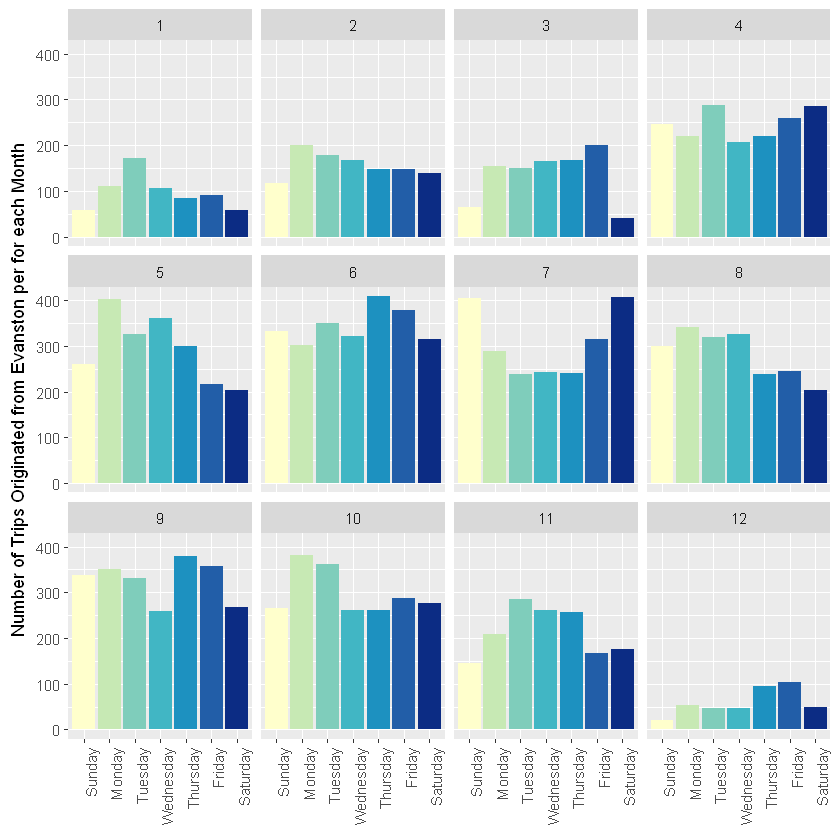

In [5]:
library(ggplot2)

g1 <- ggplot(Evanston_trips_df[Evanston_trips_df$Origin_Evanston,], aes(StartTime_wday))
g1 + geom_bar(aes(fill = StartTime_wday))+
  scale_fill_brewer(palette = "YlGnBu") +
  facet_wrap(~StartTime_Month) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position = "none") + 
  labs(x=NULL, y="Number of Trips Originated from Evanston per for each Month")

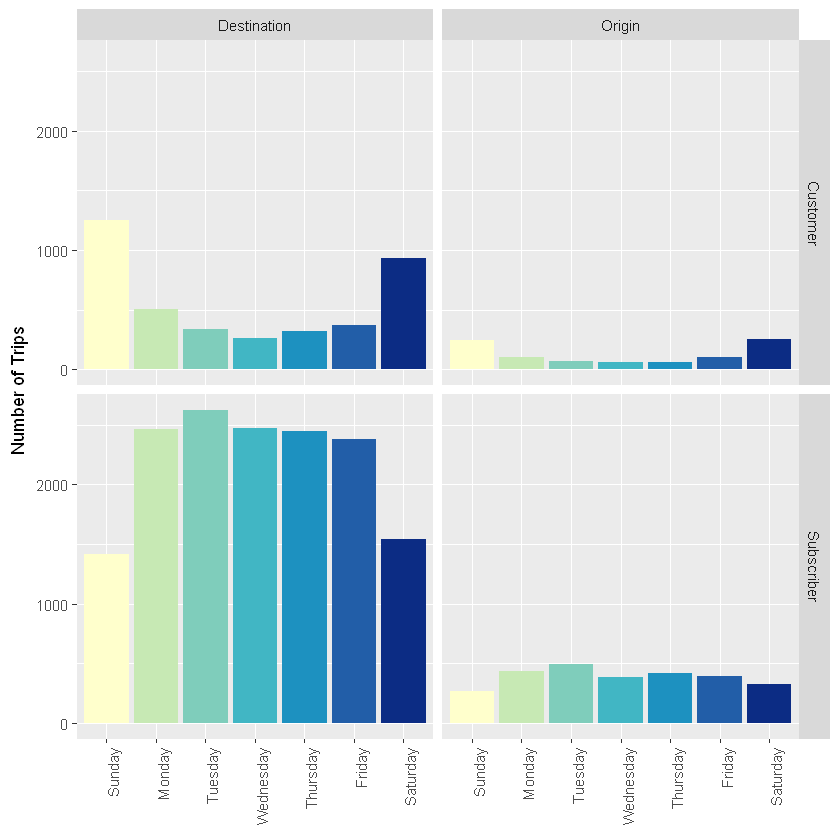

In [6]:
g3 <- ggplot(Evanston_trips_df, aes(StartTime_wday))
g3 + geom_bar(aes(fill = StartTime_wday))+
  scale_fill_brewer(palette = "YlGnBu") +
  facet_grid(usertype~Evanston) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1), legend.position = "none") + 
  labs(x=NULL, y="Number of Trips")

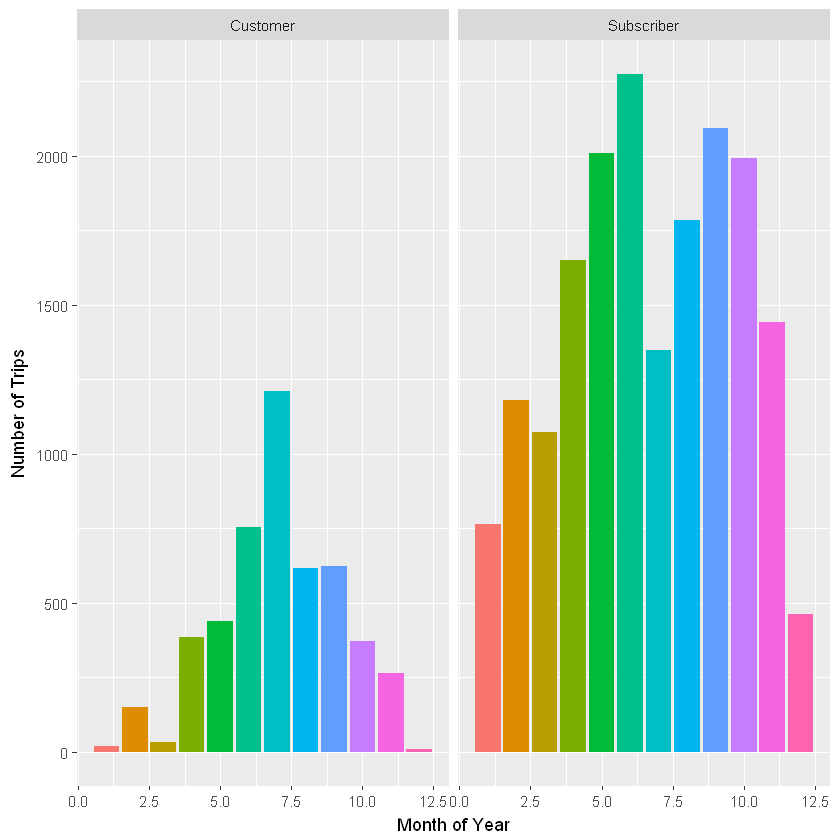

In [7]:
g4 <- ggplot(Evanston_trips_df, aes(StartTime_Month))
g4 + geom_bar(aes(fill = as.factor(StartTime_Month)))+
  facet_wrap(~usertype) +
  labs(x=NULL, y="Number of Trips")+
  theme(legend.position = "none") +
  labs(x="Month of Year", y="Number of Trips")

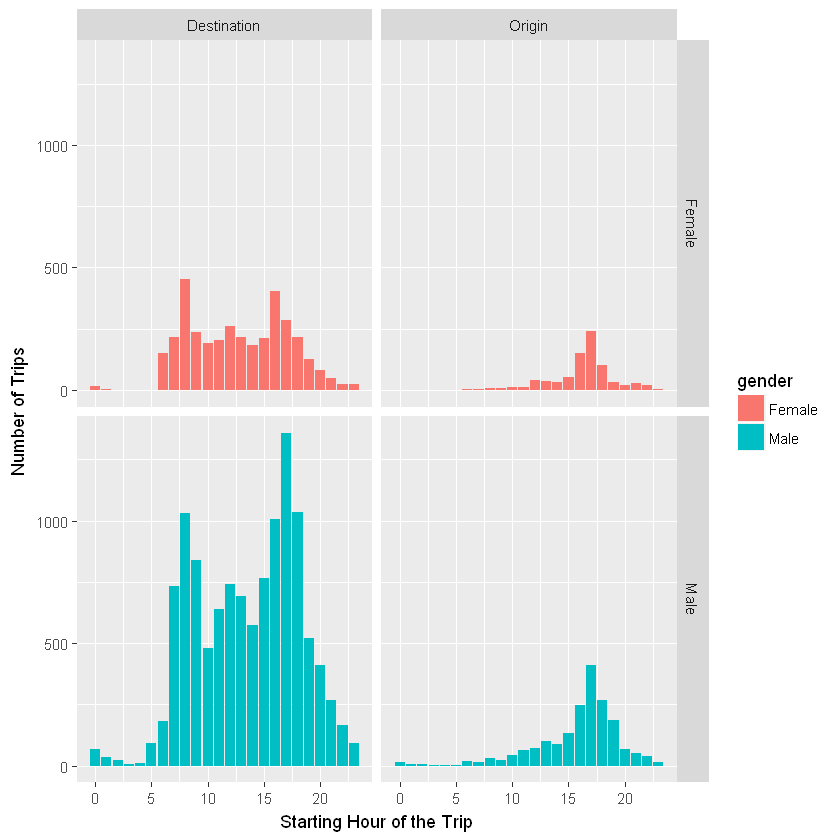

In [8]:
Evanston_Subcriber_df <- Evanston_trips_df[Evanston_trips_df$usertype == "Subscriber",]
Evanston_Subcriber_df<- Evanston_Subcriber_df[-which(!Evanston_Subcriber_df$gender %in% c("Male", "Female")),]

g2 <-  ggplot(data = Evanston_Subcriber_df , aes(StartTime_Hour))
g2 + geom_bar(aes(fill = gender)) +
  facet_grid(gender~Evanston) +
  labs(x= "Starting Hour of the Trip", y="Number of Trips")